In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor
import seaborn as sns

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [3]:
train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [4]:
train['source']='train'
test['source']='test'

In [5]:
df=pd.concat([train,test])

In [6]:
df.shape

(45730, 11)

In [7]:
df.columns

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size', 'source'],
      dtype='object')

In [8]:
df.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000,9146.000000
mean,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664,7.723348
std,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755,6.086852
min,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000,0.000000
25%,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725,2.320000
50%,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300,5.060500
75%,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800,13.336000
max,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900,20.999000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 0 to 36583
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       45730 non-null  float64
 1   size_npear      45730 non-null  float64
 2   malign_ratio    45730 non-null  float64
 3   damage_size     45730 non-null  float64
 4   exposed_area    45730 non-null  float64
 5   std_dev_malign  45730 non-null  float64
 6   err_malign      45730 non-null  float64
 7   malign_penalty  45730 non-null  int64  
 8   damage_ratio    45730 non-null  float64
 9   tumor_size      9146 non-null   float64
 10  source          45730 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 4.2+ MB


In [10]:
df.isna().sum()

mass_npea             0
size_npear            0
malign_ratio          0
damage_size           0
exposed_area          0
std_dev_malign        0
err_malign            0
malign_penalty        0
damage_ratio          0
tumor_size        36584
source                0
dtype: int64

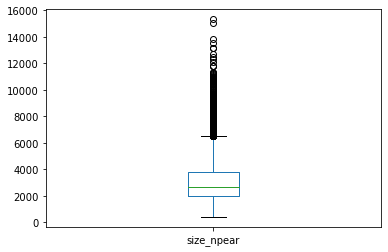

In [11]:
df["size_npear"].plot(kind = "box")

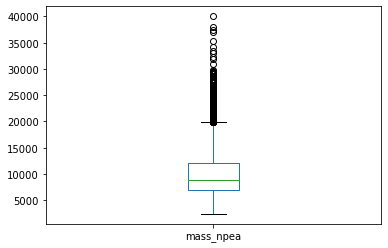

In [12]:
df["mass_npea"].plot(kind = "box")

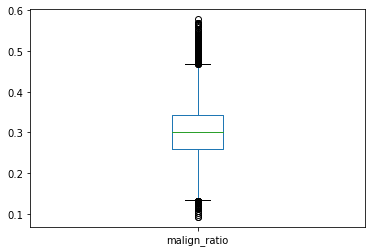

In [13]:
df["malign_ratio"].plot(kind = "box")

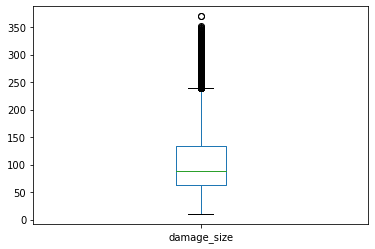

In [14]:
df["damage_size"].plot(kind = "box")

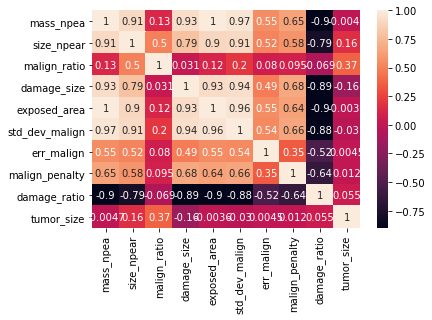

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df1=df[df.source=='train']

In [17]:
df1.shape

(9146, 11)

In [18]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = df.select_dtypes(include=np.number).drop(columns=["tumor_size"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)


          feature          VIF
0       mass_npea  2793.393763
1      size_npear   168.999278
2    malign_ratio   119.359750
3     damage_size    62.756775
4    exposed_area  2124.420812
5  std_dev_malign   136.224276
6      err_malign     7.272833
7  malign_penalty     4.839727
8    damage_ratio    69.577738


In [31]:
X=df1.drop(columns=['tumor_size','source'])
y=df1['tumor_size']

In [32]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
def run_model(model,train_X,test_X,train_y,test_y): 
    print("Model: ",model)
    model.fit(train_X,train_y)
    y_pred=model.predict(test_X)
    print("RMSE :",np.sqrt(mean_squared_error(test_y,y_pred)))


In [34]:
model=LinearRegression()
run_model(model,train_X,test_X,train_y,test_y)

Model:  LinearRegression()
RMSE : 5.22662421817924


In [35]:
model=Lasso(alpha=0.5)
run_model(model,train_X,test_X,train_y,test_y)

Model:  Lasso(alpha=0.5)
RMSE : 5.25573863661708


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81547.59009812427, tolerance: 23.93440369870153
  model = cd_fast.enet_coordinate_descent(


In [36]:
model=Ridge()
run_model(model,train_X,test_X,train_y,test_y)

Model:  Ridge()
RMSE : 5.231053092295003


In [37]:
model=ElasticNet()
run_model(model,train_X,test_X,train_y,test_y)

Model:  ElasticNet()
RMSE : 5.255397525011569


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81537.95486368646, tolerance: 23.93440369870153
  model = cd_fast.enet_coordinate_descent(


In [38]:
X=df1.drop(columns=['tumor_size','source'])

In [43]:
poly=PolynomialFeatures(degree=2)
X_train=poly.fit_transform(train_X)
X_test=poly.fit_transform(test_X)
model=LinearRegression()
run_model(model,X_train,X_test,train_y,test_y)

Model:  LinearRegression()
RMSE : 4.867134494405341


In [40]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [48]:
poly=PolynomialFeatures(degree=2)
X_train=poly.fit_transform(train_X)
X_test=poly.fit_transform(test_X)
model=Lasso(alpha=0.001)
run_model(model,X_train,X_test,train_y,test_y)

Model:  Lasso(alpha=0.001)
RMSE : 4.980707336133366


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75775.28889887407, tolerance: 23.93440369870153
  model = cd_fast.enet_coordinate_descent(


In [52]:
run_model(SVR(gamma=1),train_X,test_X,train_y,test_y)

Model:  SVR(gamma=1)
RMSE : 6.524760171569864


In [60]:
run_model(DecisionTreeRegressor(max_depth=7),train_X,test_X,train_y,test_y)

Model:  DecisionTreeRegressor(max_depth=7)
RMSE : 5.039083317609711


In [59]:
run_model(RandomForestRegressor(max_depth=6,random_state=43),train_X,test_X,train_y,test_y)

Model:  RandomForestRegressor(max_depth=6, random_state=43)
RMSE : 4.753802562386297


In [63]:
run_model(AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=6,random_state=43)),train_X,test_X,train_y,test_y)

Model:  AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=6,
                                                       random_state=43))
RMSE : 4.768578508132512


In [67]:
run_model(GradientBoostingRegressor(n_estimators=150),train_X,test_X,train_y,test_y)

Model:  GradientBoostingRegressor(n_estimators=150)
RMSE : 4.57225255394815


In [69]:
run_model(AdaBoostRegressor(GradientBoostingRegressor(n_estimators=150)),train_X,test_X,train_y,test_y)

Model:  AdaBoostRegressor(base_estimator=GradientBoostingRegressor(n_estimators=150))
RMSE : 4.746457795199991


In [76]:
estimators = []
estimators.append(('GBM', GradientBoostingRegressor(n_estimators=150)))
estimators.append(('ADB', AdaBoostRegressor(GradientBoostingRegressor(n_estimators=150))))
estimators.append(('RF', RandomForestRegressor(max_depth=6,random_state=43)))
run_model(VotingRegressor(estimators),train_X,test_X,train_y,test_y)    

Model:  VotingRegressor(estimators=[('GBM',
                             GradientBoostingRegressor(n_estimators=150)),
                            ('ADB',
                             AdaBoostRegressor(base_estimator=GradientBoostingRegressor(n_estimators=150))),
                            ('RF',
                             RandomForestRegressor(max_depth=6,
                                                   random_state=43))])
RMSE : 4.574175139902953


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36584 entries, 0 to 36583
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       36584 non-null  float64
 1   size_npear      36584 non-null  float64
 2   malign_ratio    36584 non-null  float64
 3   damage_size     36584 non-null  float64
 4   exposed_area    36584 non-null  float64
 5   std_dev_malign  36584 non-null  float64
 6   err_malign      36584 non-null  float64
 7   malign_penalty  36584 non-null  int64  
 8   damage_ratio    36584 non-null  float64
 9   source          36584 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 2.8+ MB


In [79]:
model=GradientBoostingRegressor(n_estimators=150)
model.fit(train_X,train_y)
test_X=test.drop(columns=['source'])
y_target= model.predict(test_X)

In [80]:
pd.read_csv('sample_submission.csv')

,tumor_size
0,3.418762
1,7.348026
2,3.096391
3,10.489805
4,27.416072
...,...
36579,6.980089
36580,7.591675
36581,7.315385
36582,4.724118


In [81]:
df_final=pd.DataFrame(y_target,columns=['tumor_size'])
df_final.to_csv('TumorSize.csv',index=False)